# Notebook for drawing nice pictures for posts or presentations

In this notebook, we reproduce nice plottings to be used in linkedin posts and presentations.
In particular, the following images can be reproduced:
- Image of the network and the population obtained in the gadm shapes 

## Parameters and imports
### Paths

In [1]:
# Paths of build shapes
# path of the country shapes
path_country_shapes = "pypsa-earth/resources/shapes/country_shapes.geojson"
# path of the off shore shapes
path_off_shore_shapes = "pypsa-earth/resources/shapes/offshore_shapes.geojson"
# path of the gadm shapes
path_gadm_shapes = "pypsa-earth/resources/shapes/gadm_shapes.geojson"

# Path of the OSM data
# raw OSM substation data
path_raw_substations = "pypsa-earth/resources/osm/raw/africa_all_raw_substations.geojson"
# raw OSM lines data
path_raw_lines = "pypsa-earth/resources/osm/raw/africa_all_raw_lines.geojson"

# network paths
path_cluster_network = "pypsa-earth/networks/elec_s_10.nc"
# solve network output
solved_network_path = "pypsa-earth/results/networks/elec_s_10_ec_lcopt_Co2L-12H.nc"

# Images setups
max_width_image = 30
max_height_image = 30
dpi = 300


### Python imports

In [2]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import requests
import pypsa
import shutil
from rasterio.plot import show
from shapely.wkt import loads
from shapely.geometry import Point
from shapely.geometry import LineString

# change current directory
import os
import sys

module_path = os.path.abspath(os.path.join('../../')) # To import helpers
if module_path not in sys.path:
    sys.path.append(module_path+"/pypsa-earth/scripts")
    
from _helpers import sets_path_to_root
from download_osm_data import create_country_list

sets_path_to_root("pypsa-earth-project")

This is the repository path:  /home/anas/EDF/pypsa-earth-project
Had to go 2 folder(s) up.


### Auxiliary functions

In [3]:
def calculate_width_height_image(
    width_image, height_image, max_width=max_width_image, max_height=max_height_image
):
    """
    Function to identify the width and height of an image to plot
    while keeping the proportions of the image
    """
    if width_image / height_image >= max_width / max_height:
        # image width is the limiting factor
        return (max_width, max_width / width_image * height_image)
    else:
        # image height is the limiting factor
        return (max_height / height_image * width_image, max_height)

### File imports

In [4]:
# gadm file imports
countries = gpd.read_file(path_country_shapes)
off_shore = gpd.read_file(path_off_shore_shapes)
gadm = gpd.read_file(path_gadm_shapes)

# OSM data imports
df_substations_osm_raw = gpd.read_file(path_raw_substations)
df_lines_osm_raw = gpd.read_file(path_raw_lines)

# network imports
# cluster network
n_c = pypsa.Network(path_cluster_network)
# solved network
n_solve = pypsa.Network(solved_network_path)

## Continent and raw OSM data

### Plot for the entire area downloaded

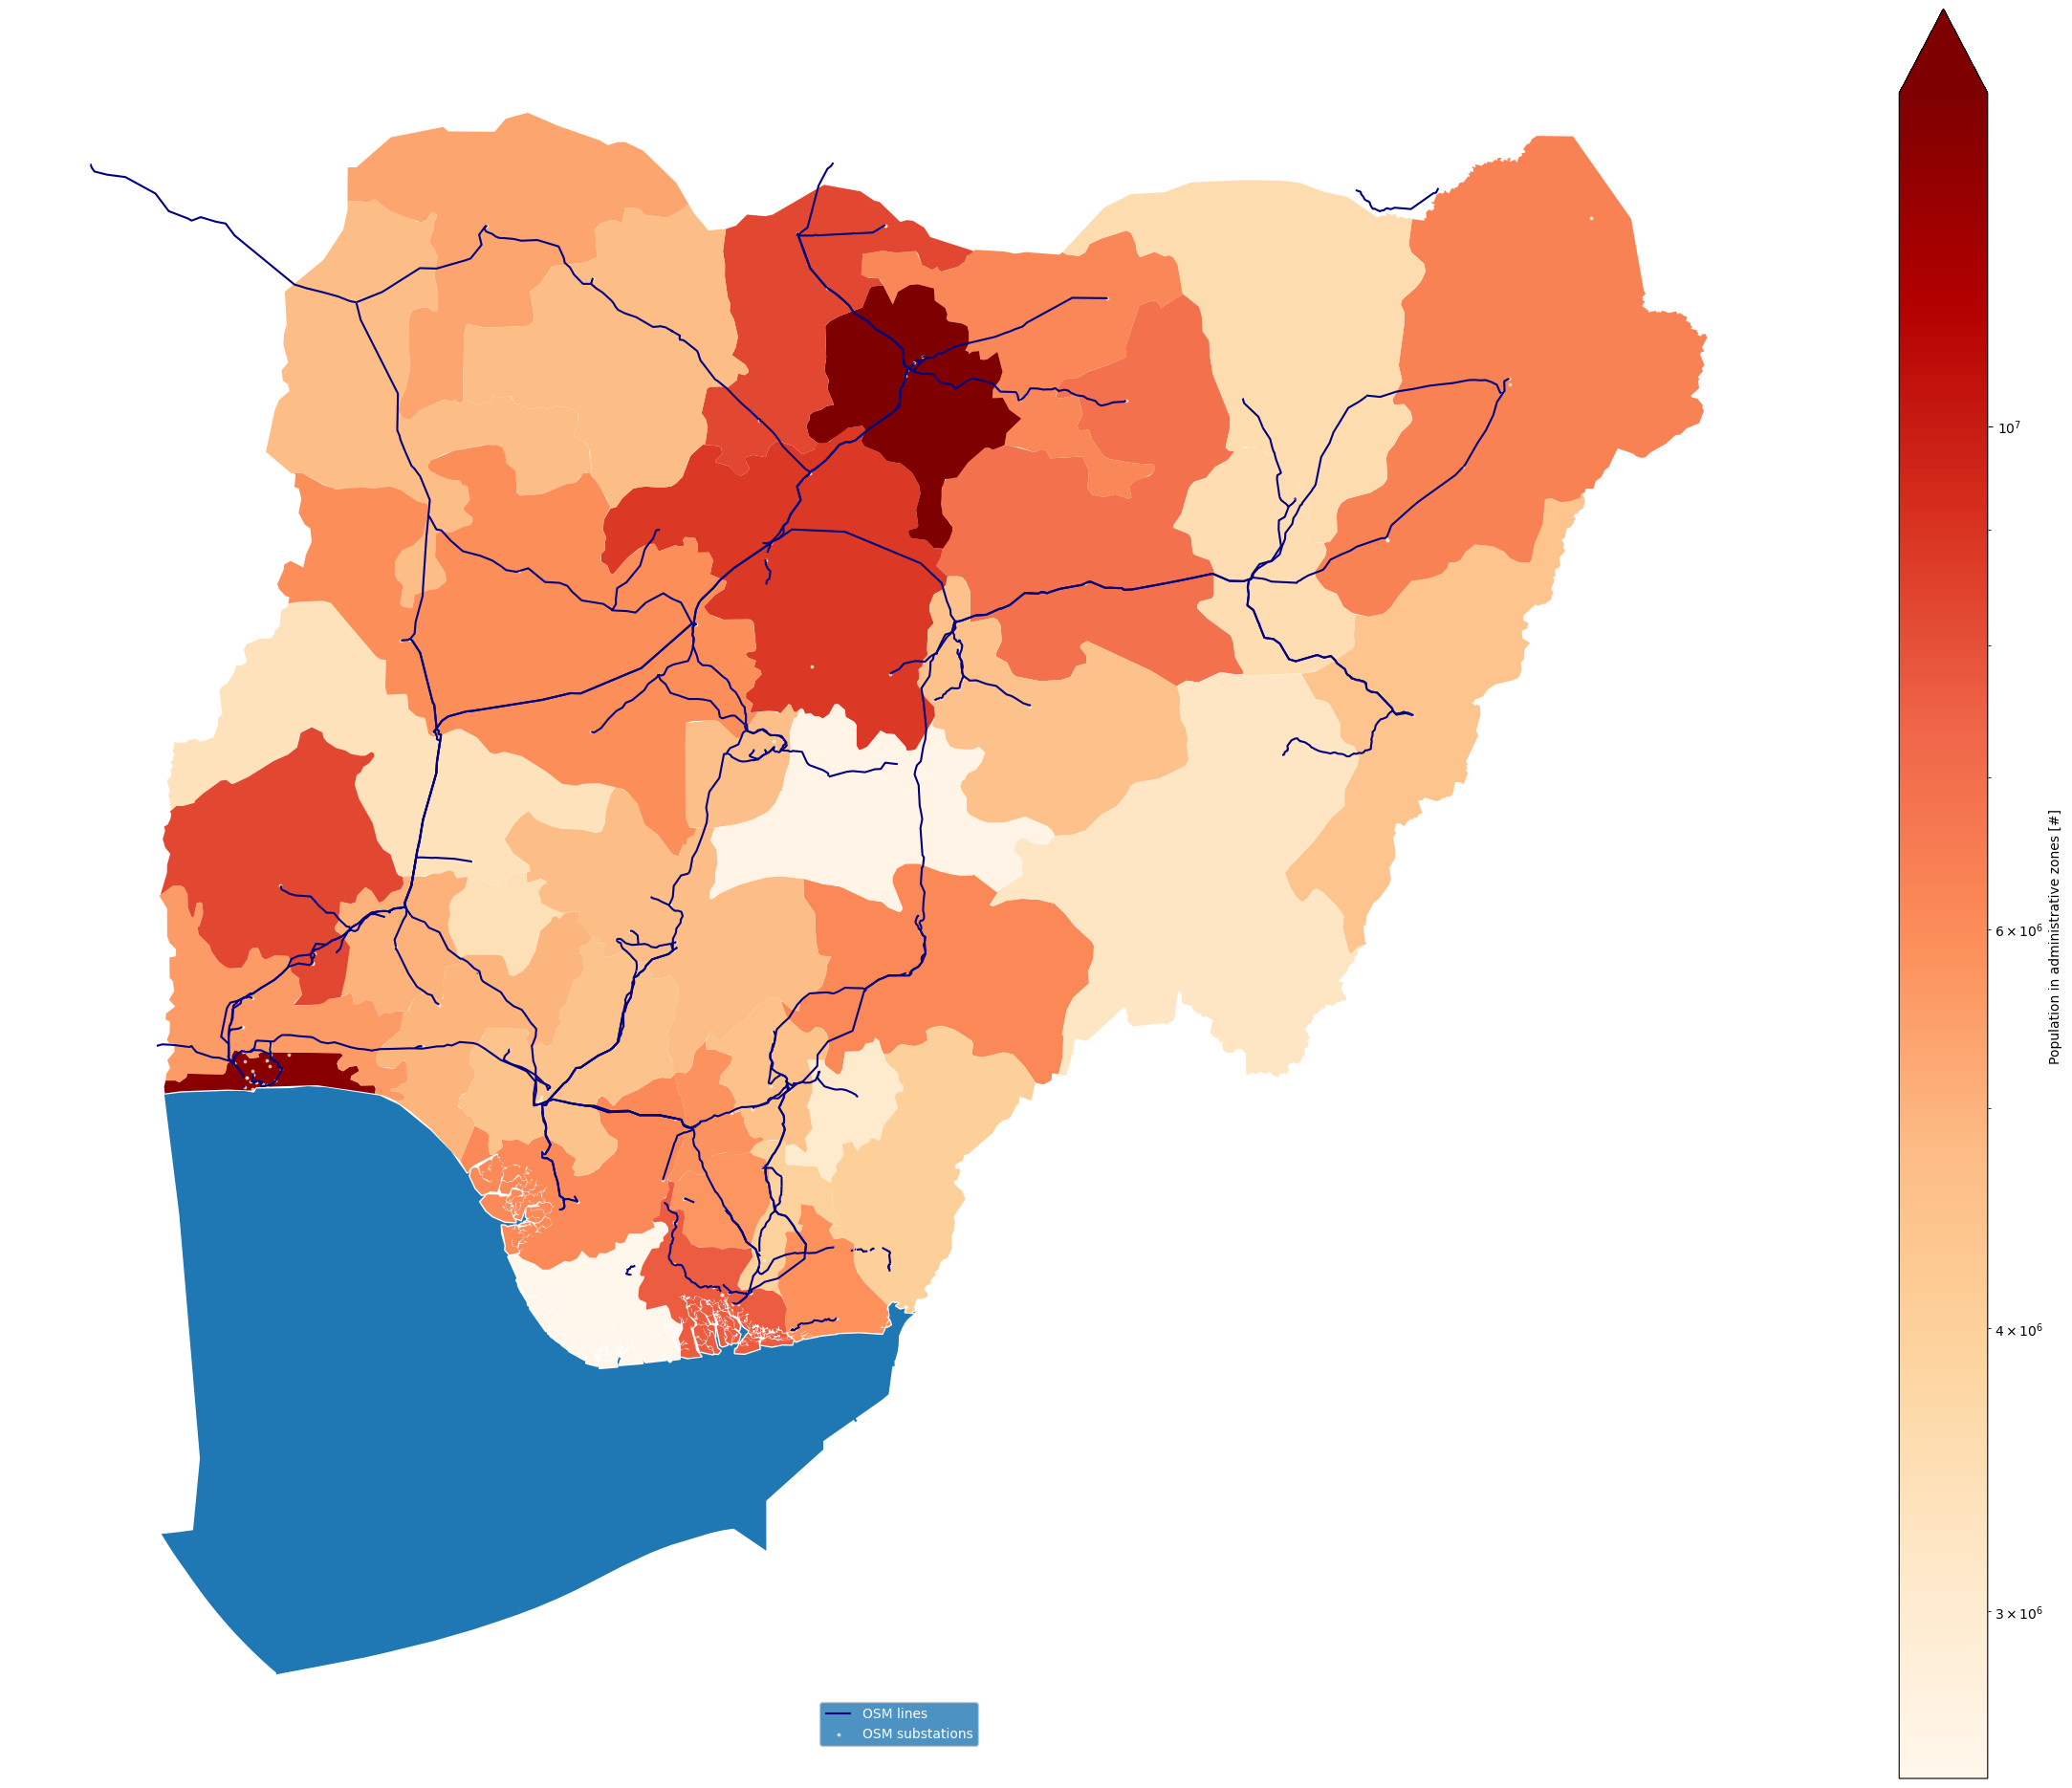

In [5]:
total_bounds_countries = countries.total_bounds
delta_bounds_xy = (
    total_bounds_countries[2] - total_bounds_countries[0],  # maxx - minx
    total_bounds_countries[3] - total_bounds_countries[1],
)  # maxy - miny

size_image = calculate_width_height_image(*delta_bounds_xy)

ax2 = gadm.plot(
    column="pop",
    cmap="OrRd",
    figsize=size_image,
    legend=True,
    label=None,
    norm=matplotlib.colors.LogNorm(
        vmin=gadm["pop"].min() + 1, vmax=gadm["pop"].max(), clip=True
    ),
    legend_kwds={"extend": "max", "label": "Population in administrative zones [#]"},
)  # column="pop",
off_shore.plot(ax=ax2, label=None)  # "offshore")
df_lines_osm_raw.plot(ax=ax2, color="navy", label="OSM lines")
df_substations_osm_raw.plot(
    ax=ax2, color="papayawhip", label="OSM substations", alpha=0.7, markersize=3
)

legend = plt.legend(
    frameon=1, loc="lower center", labelcolor="white", facecolor="tab:blue"
)

plt.axis("off")
plt.savefig("continent_image.png", dpi=dpi, bbox_inches="tight")

### Plot for a subregion specified by a string as in "countries" config

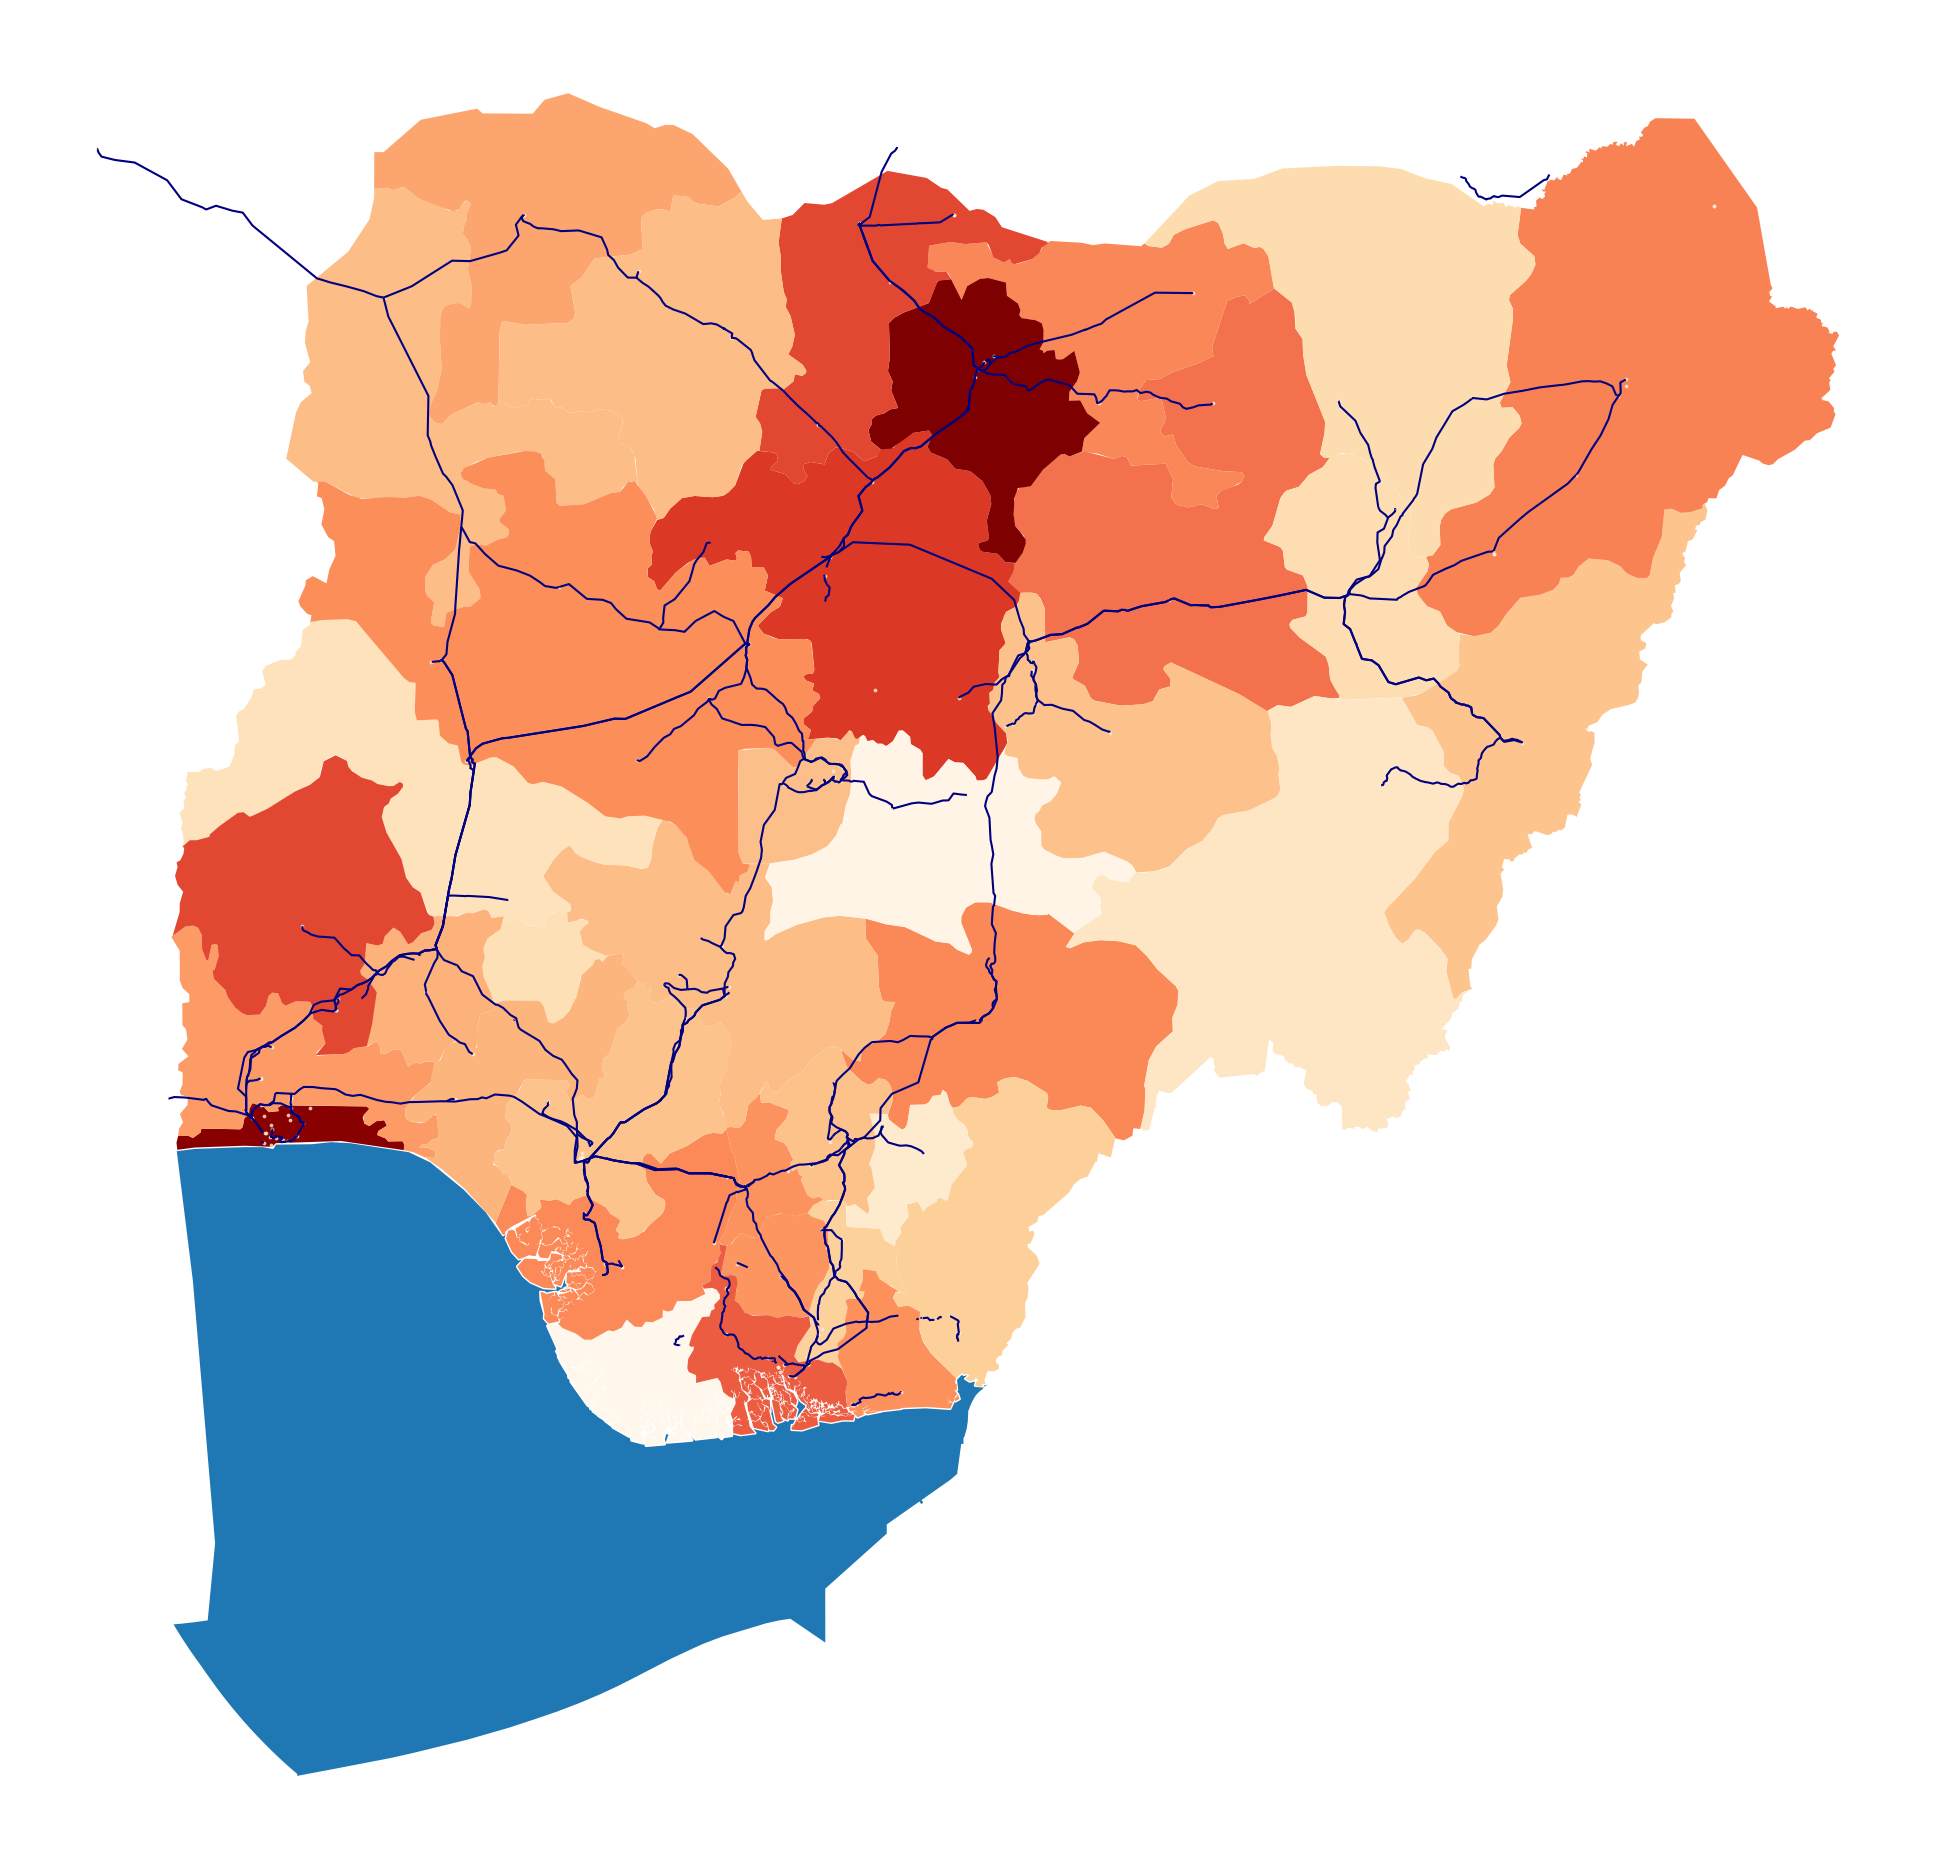

In [6]:
region = ["NG"]

list_countries = create_country_list(region)

ax2 = gadm[gadm.country.isin(list_countries)].plot(
    column="pop",
    cmap="OrRd",
    figsize=size_image,
    legend=None,
    norm=matplotlib.colors.LogNorm(
        vmin=gadm["pop"].min() + 1, vmax=gadm["pop"].max(), clip=True
    ),
)  # column="pop",
off_shore[off_shore.name.isin(list_countries)].plot(ax=ax2, label="offshore")
df_lines_osm_raw[df_lines_osm_raw.Country.isin(list_countries)].plot(
    ax=ax2, color="navy"
)
df_substations_osm_raw[df_substations_osm_raw.Country.isin(list_countries)].plot(
    ax=ax2, color="papayawhip", alpha=0.7, markersize=3
)

plt.axis("off")
plt.savefig("region_image.png", dpi=dpi)

### Plot country shape and OSM data

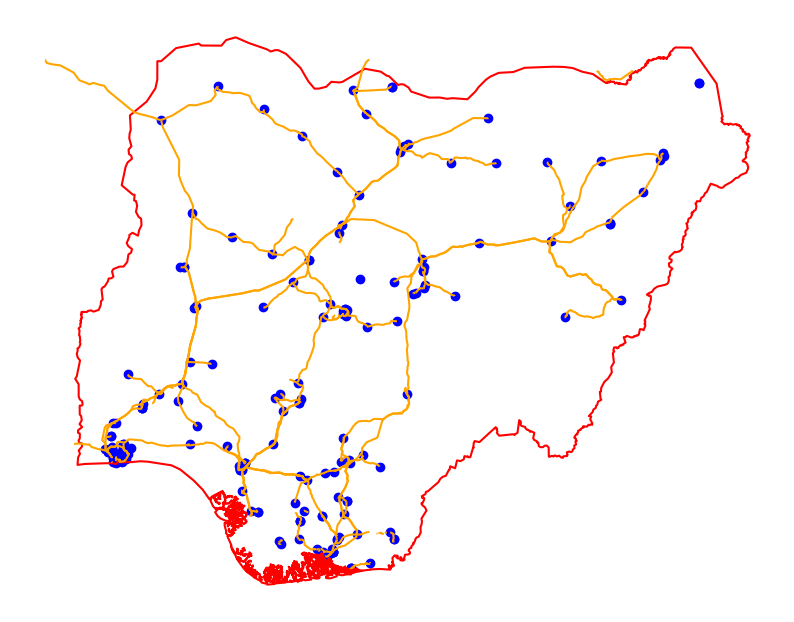

In [7]:
ax = countries.boundary.plot(figsize=(10, 10), color="red")
# off_shore.plot(ax=ax)
df_substations_osm_raw.plot(ax=ax, color="blue")
df_lines_osm_raw.plot(ax=ax, color="orange")
plt.axis("off")
plt.savefig("border_osm_total.png", dpi=dpi)

### Plot country shape and OSM data for the region

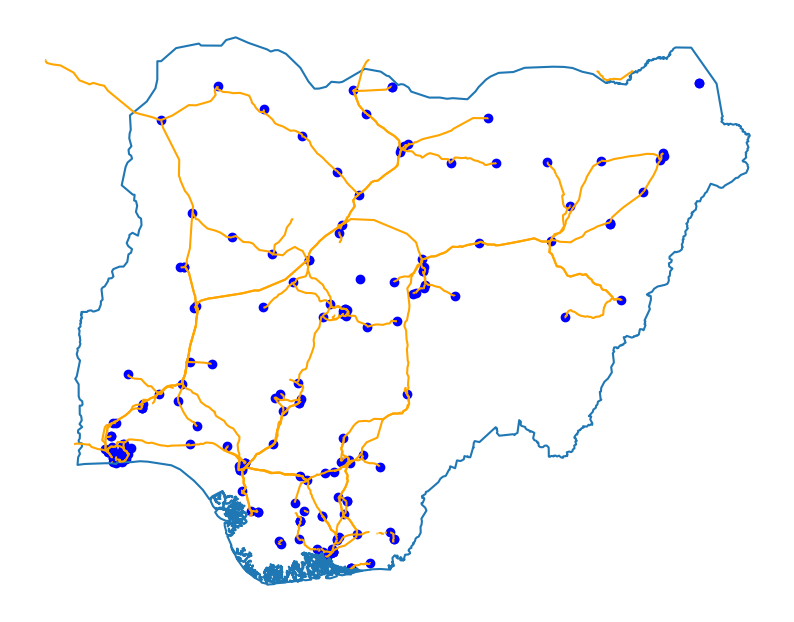

In [8]:
ax = countries[countries.name.isin(list_countries)].boundary.plot(figsize=(10, 10))
# off_shore.plot(ax=ax)
df_substations_osm_raw[df_substations_osm_raw.Country.isin(list_countries)].plot(
    ax=ax, color="blue"
)
df_lines_osm_raw[df_lines_osm_raw.Country.isin(list_countries)].plot(
    ax=ax, color="orange"
)
plt.axis("off")
plt.savefig("border_osm_region.png", dpi=dpi)

### Plot country shape and OSM data for a specific country

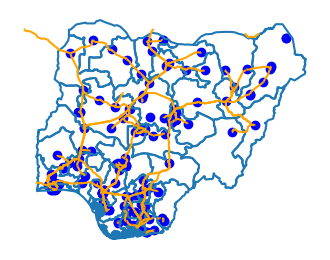

In [9]:
specific_country = ["NG"]

ax = gadm[gadm.country.isin(specific_country)].boundary.plot(figsize=(4, 4))
# off_shore.plot(ax=ax)
df_substations_osm_raw[df_substations_osm_raw.Country.isin(specific_country)].plot(
    ax=ax, color="blue"
)
df_lines_osm_raw[df_lines_osm_raw.Country.isin(specific_country)].plot(
    ax=ax, color="orange"
)
plt.axis("off")
plt.savefig("border_osm_specificregion.png", dpi=dpi)

## Cluster network features

### Plot cluster network

/home/anas/anaconda3/envs/pypsa-earth/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


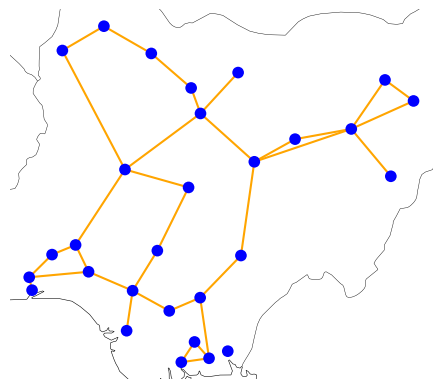

In [10]:
# buses dataframe
buses_c = n_c.buses
buses_c["geometry"] = gpd.points_from_xy(buses_c.x, buses_c.y)
buses_c = gpd.GeoDataFrame(buses_c, crs="epsg:4326")

# lines dataframe
lines_c = n_c.lines
lines_c["geometry"] = lines_c.apply(
    lambda x: LineString(
        [buses_c.loc[x["bus0"], "geometry"], buses_c.loc[x["bus1"], "geometry"]]
    ),
    axis=1,
)
lines_c = gpd.GeoDataFrame(lines_c, crs="epsg:4326")

n_c.plot(bus_colors="blue", line_colors="orange")

plt.savefig("cluster_network.png", dpi=dpi)

## Data report on installed generation

In [11]:
# filter only generators
generators = n_solve.generators

# obtain installed generation by carrier
generators.groupby(by="carrier")["p_nom_opt"].sum()

carrier
CCGT      0.0
OCGT      0.0
load      0.0
oil       0.0
onwind    0.0
solar     0.0
Name: p_nom_opt, dtype: float64

In [12]:
n_solve.links.groupby(by="carrier")["p_nom_opt"].sum()

carrier
H2 electrolysis       0.0
H2 fuel cell          0.0
battery charger       0.0
battery discharger    0.0
Name: p_nom_opt, dtype: float64

In [13]:
n_solve.storage_units.groupby(by="carrier")["p_nom_opt"].sum() / 1000

carrier
hydro    0.0
Name: p_nom_opt, dtype: float64

In [14]:
n_solve.storage_units

,efficiency_store,efficiency_dispatch,bus,cyclic_state_of_charge,max_hours,p_min_pu,carrier,p_nom,marginal_cost,control,...,capital_cost,build_year,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
NGA.27_1 hydro,0.0,0.9,NGA.27_1,True,6.0,0.0,hydro,1905.414013,0.010332,PQ,...,0.0,0,inf,0.0,False,NaN,True,0.0,0.0,0.0
